# Packages

In [241]:
# Packages used for the project
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import os
import requests
import matplotlib.pyplot as plt
%matplotlib inline
import csv

# Gather the Data

## Enhanced Twitter Archive 

We have this file on hand and so have downloaded it manually

In [4]:
# twitter archive is downloaded manually as a file we have on hand
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

## Image Predictions

The file (image_predictions.tsv) hosted on Udacity's servers and was downloaded programmatically using the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

In [5]:
folder_name = 'image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    
# Downloads the image_predictions.tsv programmatically from Udacity's servers
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

In [6]:
with open(os.path.join(folder_name, 
                      url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)

In [7]:
image_predictions = pd.read_csv('U:/Professional Development/Udacity/Projects/T2 P2/image_predictions/image-predictions.tsv', sep='\t')

## Twitter API

Tweet ID, retweet count and favorite count queried from Twitter's API. Available information includes:

  - reply_count: Number of times this Tweet has been replied to
  - retweet_count: Number of times this Tweet has been retweeted
  - favorite_count: Indicates approximately how many times this Tweet has been liked by Twitter users.
  - created_at: UTC time when this Tweet was created
  - withheld_in_countries: When present, indicates a list of uppercase two-letter country codes this content is withheld from. Twitter supports the following non-country values for this field: “XX” - Content is withheld in all countries “XY” - Content is withheld due to a DMCA request.

For this assessment I will use retweet_count and favorite_count.

## Twitter API additional twitter information

In [237]:
# Create authentication to Twtitter's API using Python's Tweepy library
# Take out consumer key, consumer secret, access token and access secret before submitting the project
#Twitter API credentials
consumer_key = 'consumer_key'
consumer_secret = 'consumer_secret'
access_token = 'access_token'
access_secret = 'access_secret'

#authorize twitter, initialize tweepy
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

In [342]:
def get_all_tweets(screen_name):
    #Twitter only allows access to a users most recent 3240 tweets with this method
        
    #initialize a list to hold all the tweepy Tweets
    alltweets = []    
    
    #make initial request for most recent tweets (200 is the maximum allowed count)
    new_tweets = api.user_timeline(screen_name = screen_name,count=200)
    
    #save most recent tweets
    alltweets.extend(new_tweets)
    
    #save the id of the oldest tweet less one
    oldest = alltweets[-1].id - 1
    
    #keep grabbing tweets until there are no tweets left to grab
    while len(new_tweets) > 0:
        print("getting tweets before %s" % (oldest))
        
        #all subsiquent requests use the max_id param to prevent duplicates
        new_tweets = api.user_timeline(screen_name = screen_name,count=200,max_id=oldest)
        
        #save most recent tweets
        alltweets.extend(new_tweets)
        
        #update the id of the oldest tweet less one
        oldest = alltweets[-1].id - 1
        
        print("...%s tweets downloaded so far" % (len(alltweets)))
    
    #transform the tweepy tweets into a 2D array that will populate the csv    
    outtweets = [[tweet.id_str, tweet.in_reply_to_status_id, tweet.in_reply_to_user_id, str(tweet.created_at), tweet.source, 
                  tweet.text.encode("utf-8")] for tweet in alltweets]
    
    #with open('%s_tweets.txt'% screen_name, 'w') as outfile:  
    #    json.dump(list(outtweets), outfile)  
    
    with open('%s_tweets.csv' % screen_name, 'w', newline='') as f:
        writer = csv.writer(f)
        writer.writerow(["tweet_id", "in_reply_to_status_id", "in_reply_to_user_id", "timestamp", "source",
                         "text"])
        writer.writerows(outtweets)
    
    pass

    


if __name__ == '__main__':
    #pass in the username of the account you want to download
    get_all_tweets("dog_rates")


getting tweets before 925391981131448319
...399 tweets downloaded so far
getting tweets before 915290313941557247
...598 tweets downloaded so far
getting tweets before 908036999638069247
...797 tweets downloaded so far
getting tweets before 900374366629789696
...997 tweets downloaded so far
getting tweets before 892177421306343425
...1197 tweets downloaded so far
getting tweets before 883762009086537727
...1397 tweets downloaded so far
getting tweets before 876594457126109183
...1597 tweets downloaded so far
getting tweets before 869596645499047937
...1796 tweets downloaded so far
getting tweets before 860167721564217343
...1994 tweets downloaded so far
getting tweets before 851857518913572864
...2194 tweets downloaded so far
getting tweets before 840761248237133824
...2394 tweets downloaded so far
getting tweets before 835624797816176639
...2594 tweets downloaded so far
getting tweets before 829819886616637440
...2794 tweets downloaded so far
getting tweets before 822937869148950528
.

In [343]:
new_tweet_info = pd.read_csv('dog_rates_tweets.csv')

In [344]:
new_tweet_info

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text
0,932416024724488193,NaN,NaN,2017-11-20 01:11:18,Twitter for iPhone,b'This is Dave. He thinks he\xe2\x80\x99s a to...
1,932390033960636416,9.323885e+17,2.845196e+09,2017-11-19 23:28:01,Twitter for iPhone,b'@RasTheBerry \xe2\x9d\xa4\xef\xb8\x8f'
2,932352280350875649,9.323518e+17,2.937336e+07,2017-11-19 20:58:00,Twitter for iPhone,b'@reneereizman \xe2\x9d\xa4\xef\xb8\x8f'
3,932350214937153536,NaN,NaN,2017-11-19 20:49:48,Twitter for iPhone,b'Big thanks to @OutdoorVoices for hosting a w...
4,932316928806400000,9.323128e+17,7.613065e+17,2017-11-19 18:37:32,Twitter for iPhone,b'@TeamDan0717 @DevinLewis1500 weratedogs'
5,932316883981885441,9.323134e+17,7.946488e+17,2017-11-19 18:37:21,Twitter for iPhone,b'@k8ecope amazing'
6,932302510848724992,NaN,NaN,2017-11-19 17:40:14,Twitter for iPhone,"b""RT @DevinLewis1500: If you don't follow @dog..."
7,932023496938610688,9.320214e+17,8.805112e+17,2017-11-18 23:11:32,Twitter for iPhone,b'@agust_d97 @dog_feelings ok that\xe2\x80\x99...
8,932018401215746048,9.320104e+17,5.745075e+07,2017-11-18 22:51:17,Twitter for iPhone,b'@grjpatterson awwwww'
9,931958433372409857,NaN,NaN,2017-11-18 18:53:00,Twitter for iPhone,b'Meet Toby. After years of having to put effo...


In [345]:
#Compiling the list of tweet ids from the twitter_archive
archive_id = twitter_archive['tweet_id']
new_id = new_tweet_info['tweet_id']
tweet_id_list = pd.concat([archive_id, new_id])
tweet_id_list

0       892420643555336193
1       892177421306343426
2       891815181378084864
3       891689557279858688
4       891327558926688256
5       891087950875897856
6       890971913173991426
7       890729181411237888
8       890609185150312448
9       890240255349198849
10      890006608113172480
11      889880896479866881
12      889665388333682689
13      889638837579907072
14      889531135344209921
15      889278841981685760
16      888917238123831296
17      888804989199671297
18      888554962724278272
19      888202515573088257
20      888078434458587136
21      887705289381826560
22      887517139158093824
23      887473957103951883
24      887343217045368832
25      887101392804085760
26      886983233522544640
27      886736880519319552
28      886680336477933568
29      886366144734445568
               ...        
3171    805580710027427840
3172    805561819687436288
3173    805555276682248192
3174    805520635690676224
3175    805487436403003392
3176    805252815190970373
3

In [284]:
#querying twitter's api to get the retweet count and favorite count
#https://developer.twitter.com/en/docs/tweets/data-dictionary/overview/tweet-object

tweet_count = []
tweet_errors = []
for tweetid in tweet_id_list:
    try:
        tweet = api.get_status(tweetid, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)
        print(tweetid)
        retweet_count = tweet.retweet_count
        favorite_count = tweet.favorite_count
        created_at = tweet.created_at
        tweet_count.append({'tweet_id': str(tweetid),
                            'retweet_count': retweet_count,
                            'favorite_count': favorite_count})
    except Exception as e:
        print(str(tweetid) + str(e))
        tweet_errors.append({'tweet_id': tweetid})


with open('tweet_json.txt', 'w') as outfile:  
    json.dump(tweet_count, outfile)     

892420643555336193
892177421306343426
891815181378084864
891689557279858688
891327558926688256
891087950875897856
890971913173991426
890729181411237888
890609185150312448
890240255349198849
890006608113172480
889880896479866881
889665388333682689
889638837579907072
889531135344209921
889278841981685760
888917238123831296
888804989199671297
888554962724278272
888202515573088257[{'code': 144, 'message': 'No status found with that ID.'}]
888078434458587136
887705289381826560
887517139158093824
887473957103951883
887343217045368832
887101392804085760
886983233522544640
886736880519319552
886680336477933568
886366144734445568
886267009285017600
886258384151887873
886054160059072513
885984800019947520
885528943205470208
885518971528720385
885311592912609280
885167619883638784
884925521741709313
884876753390489601
884562892145688576
884441805382717440
884247878851493888
884162670584377345
883838122936631299
883482846933004288
883360690899218434
883117836046086144
882992080364220416
8827626945

822244816520155136
822163064745328640
821886076407029760
821813639212650496
821765923262631936
821522889702862852
821421320206483457
821407182352777218
821153421864615936
821149554670182400
821107785811234820
821044531881721856
820837357901512704
820749716845686786
820690176645140481
820494788566847489
820446719150292993
820314633777061888
820078625395449857
820013781606658049
819952236453363712
819924195358416896
819711362133872643
819588359383371776
819347104292290561
819238181065359361
819227688460238848
819015337530290176
819015331746349057
819006400881917954
819004803107983360
818646164899774465
818627210458333184
818614493328580609
818588835076603904
818536468981415936
818307523543449600
818259473185828864
818145370475810820
817908911860748288
817827839487737858
817777686764523521
817536400337801217
817502432452313088
817423860136083457
817415592588222464
817181837579653120
817171292965273600
817120970343411712
817056546584727552
816829038950027264
816816676327063552
816697700272

766793450729734144
766714921925144576
766693177336135680
766423258543644672
766313316352462849
766078092750233600
766069199026450432
766008592277377025
765719909049503744
765669560888528897
765395769549590528
765371061932261376
765222098633691136
764857477905154048
764259802650378240
763956972077010945
763837565564780549
763183847194451968
763167063695355904
763103485927849985
762699858130116608
762471784394268675
762464539388485633
762316489655476224
762035686371364864
761976711479193600
761750502866649088
761745352076779520
761672994376806400
761599872357261312
761371037149827077
761334018830917632
761292947749015552
761227390836215808
761004547850530816
760893934457552897
760656994973933572
760641137271070720
760539183865880579
760521673607086080
760290219849637889
760252756032651264
760190180481531904
760153949710192640
759943073749200896
759923798737051648
759846353224826880
759793422261743616
759566828574212096
759557299618865152
759447681597108224
759446261539934208
759197388317

709198395643068416
709179584944730112
709158332880297985
709042156699303936
708853462201716736
708845821941387268
708834316713893888
708810915978854401
708738143638450176
708711088997666817
708479650088034305
708469915515297792
708400866336894977
708356463048204288
708349470027751425
708149363256774660
708130923141795840
708119489313951744
708109389455101952
708026248782585858
707995814724026368
707983188426153984
707969809498152960
707776935007539200
707741517457260545
707738799544082433
707693576495472641
707629649552134146
707610948723478529
707420581654872064
707411934438625280
707387676719185920
707377100785885184
707315916783140866
707297311098011648
707059547140169728
707038192327901184
707021089608753152
707014260413456384
706904523814649856
706901761596989440
706681918348251136
706644897839910912
706593038911545345
706538006853918722
706516534877929472
706346369204748288
706310011488698368
706291001778950144
706265994973601792
706169069255446529
706166467411222528
706153300320

680889648562991104
680836378243002368
680805554198020098
680801747103793152
680798457301471234
680609293079592961
680583894916304897
680497766108381184
680494726643068929
680473011644985345
680440374763077632
680221482581123072
680206703334408192
680191257256136705
680176173301628928
680161097740095489
680145970311643136
680130881361686529
680115823365742593
680100725817409536
680085611152338944
680070545539371008
680055455951884288
679877062409191424
679872969355714560
679862121895714818
679854723806179328
679844490799091713
679828447187857408
679777920601223168
679736210798047232
679729593985699840
679722016581222400
679530280114372609
679527802031484928
679511351870550016
679503373272485890
679475951516934144
679462823135686656
679405845277462528
679158373988876288
679148763231985668
679132435750195208
679111216690831360
679062614270468097
679047485189439488
679001094530465792
678991772295516161
678969228704284672
678800283649069056
678798276842360832
678774928607469569
678767140346

670055038660800512
670046952931721218
670040295598354432
670037189829525505
670003130994700288
669993076832759809
669972011175813120
669970042633789440
669942763794931712
669926384437997569
669923323644657664
669753178989142016
669749430875258880
669684865554620416
669683899023405056
669682095984410625
669680153564442624
669661792646373376
669625907762618368
669603084620980224
669597912108789760
669583744538451968
669573570759163904
669571471778410496
669567591774625800
669564461267722241
669393256313184256
669375718304980992
669371483794317312
669367896104181761
669363888236994561
669359674819481600
669354382627049472
669353438988365824
669351434509529089
669328503091937280
669327207240699904
669324657376567296
669216679721873412
669214165781868544
669203728096960512
669037058363662336
669015743032369152
669006782128353280
669000397445533696
668994913074286592
668992363537309700
668989615043424256
668988183816871936
668986018524233728
668981893510119424
668979806671884288
668975677807

924296793202020357
924296476922122240
924048180546859008
924037931823718403
924008448567791616
924004727809077249
924004620837507079
924004565887995904
923990674407612416
923990513744859136
923963382683889664
923957933200887809
923944548937748481
923943451883982848
923927351267921928
923900635745005569
923737837706588161
923727562383220737
923701114880475136
923673780718854144
923666217277313024
923664726370013184
923624158944219136
923583996944142336
923582215962980352
923339298757279744
923338689715032064
923249134882246657
923218360917200903
923218182554480644
923213674063564800
923209569098223616
Rate limit reached. Sleeping for: 598
923199605189332997
922975385586892801
922947058897743872
922911894213718017
922885743588102144
922873886219423745
922866388938747907
922859076010246144
922613747272871937
922578044275052544
922525427096260608
922248630161104897
922243518785081344
922233534718316544
922216265548222465
922191899057971205
922167484660224000
921869936980647936
921868805143

906665950480609287
906635527436283904
906564982590132225
906562052914741248
906534171652362240
906314328680402944
906237048159338496
906234753086623744
906217059977191424
905951850658136064
905928729901363200
905916686758551553
905887660912369665
905862956205953024
905862749842006017
905824321540673536
905583953133920257
905566438848696320
905566068751654912
905550448186281988
905522918360309760
905517974391574528
905517933677424645
905471428790816770
905471297588572160
905469246188216320
905468331175661570
905257417457500161
905252446221590528
905222050297643008
905196393643552768
905180338791514113
905179682009690114
905175402502660096
905171788224753664
905160055707848704
905151931957616640
905135534355476480
905116300346871809
905115315511713792
905099513043587072
905098956430086144
905082258054418432
905079759352291330
905079268476145665
905055559233228800
904870239850168320
904858013206552576
904808832555155457
904808572915257344
904740498342113280
904721972256538625
904719195958

889512881850646528
889460883323314176
889278841981685760
889274656531906562
889224377455312897
889218244925681664
888917238123831296
888826191246962688
888804989199671297
888554962724278272
888401755150725121
888092155293691904
888079912048963585
888078434458587136
888071056854052865
887813716372336641
887717401529376769
887705289381826560
887697455684489216
887697351758020608
887696817571467264
887517139158093824
887473957103951883
887459428466929666
887394862844301312
887343217045368832
887164709560090624
887125052646465536
887112637674393600
887109463576104960
887106120900382721
887101799680937984
887101392804085760
887031978926723072
886983737581416448
886983233522544640
886760339286757376
886752859584417792
886740849425620992
886740757352247297
886736880519319552
886697079988510722
886680336477933568
886671569895948289
886366144734445568
886358942405742592
886300544708468736
886289870343217153
886284293072240645
886279917117128704
886279675244273664
886278612437024769
886277951318

872205634707509248
872186556668407812
872133149614108676
872122724285648897
872115850748321794
872114819180228608
872113361940602882
872107996154933248
872106974766346240
871894186848661504
871879754684805121
871859185608249345
871857526857510913
871853611558596608
871853366925832192
871793920115605504
871787322387378176
871779791430717440
871772062305669120
871762521631449091
871752247461466112
871543390286090240
871542492612751361
871521111208583168
871516556781662212
871516457569538049
871515927908634625
871475421338099714
871474322648518656
871166179821445120
871102520638267392
871096126509862913
871079942095642624
871032628920680449
871024683809943552
871024458672242689
870998827335114753
870998789359902720
870992649335046144
870856828854423552
870844231165911040
870804317367881728
870750778880929792
870745958996471808
870742366612795394
870735498423226369
870730465237487616
870729261778444293
870726314365509632
870726059553148928
870722065460068352
870707376793333760
870660554460

854094881396056064
854059970169622529
854057481936547841
854056482723287040
854055616960225280
854010172552949760
853983595853205504
853774418279108608
853763323816546310
853763003476574209
853760880890318849
853749659055116288
853735880745529345
853727258783215618
853650685115727872
853639147608842240
853615301342228480
853480541957619712
853465059032535041
853463049117868034
853313695962759169
853305099497680903
853304436520878081
853299958564483072
853113694183714816
853053615065509888
852936405516943360
852912242202992640
852833245913694209
852718316934377472
852713194833498113
852712228075819012
852703013802311680
852677345819414528
852672615818899456
852652523483779072
852560708931915776
852554938680999936
852553447878664193
852549591161548800
852537499876511745
852533841550073856
852533749728378887
852505986581626880
852311364735569921
852308971734142976
852304046673334272
852303073401765888
852228561247375360
852227200401252357
852226086759018497
852189679701164033
851953902622

836378771427115010
836376034706587649
836360777128894464
836341509733638145
836295787810283524
836260088725786625
836244606035636225
836242229169639429
836226197453475840
836092957291851776
836037529300254720
836036041991663616
836026745472045057
836024557198852097
836022485195816961
836001077879255040
835993303128604672
835991790805217280
835922821150814208
835871656396664832
835717085087023107
835715526806618112
835708453167501312
835704061538205696
835685285446955009
835678885849284608
835624797816176640
835624767986225157
835588885233209344
835588634308972544
835578151870808064
835575336406560768
835574547218894849
835562720846041089
835553157338005506
835552147408359425
835536468978302976
835309094223372289
835297930240217089
835278957851344896
835276731858751493
835274851220881408
835273618754056193
835264098648616962
835261144151568384
835253276962611204
835246439529840640
835199443263700992
835188065278787586
835187610893045760
835179105976975361
835172783151792128
835156907665

822794828484329472
822794065246875648
822647212903690241
822634861773160453
822615464090202113
822610679748239364
822610361945911296
822551008849068033
822496114087759872
822495473521061891
822491925991346177
822489057087389700
822473321891696641
822462944365645825
822252638343286788
822244816520155136
822177293577650176
822163064745328640
821922952191102976
821904353665683456
821888186066567169
821886076407029760
821825052106784769
821813639212650496
821813538255683584
821765923262631936
821538305728716801
821537327717593088
821522889702862852
821501223283097600
821484101777653760
821474439657377793
821421320206483457
821410146458931200
821407182352777218
821164428120981504
821153421864615936
821149554670182400
821107785811234820
821077364901875712
821069362442473476
821060390272569346
821044531881721856
821025653331992577
820837357901512704
820793444880777216
820749716845686786
820737464323162113
820729595569782785
820726610118766592
820723207623811072
820713260622155776
820705485137

In [432]:
# load the json file
with open('tweet_json.txt') as json_file:  
    tweet_count_list = json.load(json_file)

In [436]:
# Create a pandas data frame from the json file
tweet_count_list = pd.DataFrame(tweet_count_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])
tweet_count_list = tweet_count_list.sort_values('tweet_id').reset_index(drop=True)
tweet_count_list.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5550 entries, 0 to 5549
Data columns (total 3 columns):
tweet_id          5550 non-null object
retweet_count     5550 non-null int64
favorite_count    5550 non-null int64
dtypes: int64(2), object(1)
memory usage: 130.2+ KB


In [434]:
# Create a pandas data frame for the tweets with a tweet_id error and creates a .csv file of the errors
tweet_errors = pd.DataFrame(tweet_errors, columns = ['tweet_id'])
tweet_errors.to_csv('tweet_errors.csv', index=False)

# Assessing the Data

Firstly we'll assess the twitter_archive file. The file has 2,356 entries with information of the tweets.

In [289]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [231]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


Next we'll assess the new tweet information that was pulled from the Twitter API using Tweepy.

In [290]:
new_tweet_info.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,created_at,source,text
0,932416024724488193,NaN,NaN,2017-11-20 01:11:18,Twitter for iPhone,b'This is Dave. He thinks he\xe2\x80\x99s a to...
1,932390033960636416,9.323885e+17,2.845196e+09,2017-11-19 23:28:01,Twitter for iPhone,b'@RasTheBerry \xe2\x9d\xa4\xef\xb8\x8f'
2,932352280350875649,9.323518e+17,2.937336e+07,2017-11-19 20:58:00,Twitter for iPhone,b'@reneereizman \xe2\x9d\xa4\xef\xb8\x8f'
3,932350214937153536,NaN,NaN,2017-11-19 20:49:48,Twitter for iPhone,b'Big thanks to @OutdoorVoices for hosting a w...
4,932316928806400000,9.323128e+17,7.613065e+17,2017-11-19 18:37:32,Twitter for iPhone,b'@TeamDan0717 @DevinLewis1500 weratedogs'


In [291]:
new_tweet_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3200 entries, 0 to 3199
Data columns (total 6 columns):
tweet_id                 3200 non-null int64
in_reply_to_status_id    1854 non-null float64
in_reply_to_user_id      1871 non-null float64
created_at               3200 non-null object
source                   3200 non-null object
text                     3200 non-null object
dtypes: float64(2), int64(1), object(3)
memory usage: 150.1+ KB


Next we'll assess the image_predictions file. The file has predictions on 2,075 tweets. 

In [232]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [233]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [234]:
image_predictions['p1'].value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
malamute                      30
cocker_spaniel                30
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            23
seat_belt                     22
Staffordshire_bullterrier     20
Siberian_husky                20
German_shepherd               20
Cardigan                      19
web_site                      19
teddy                         18
Eskimo_dog                    18
Shetland_sheepdog             18
Maltese_dog                   18
beagle                        18
Rottweiler                    17
Shih-Tzu                      17
Lakeland_terrier              17
kuvasz                        16
Italian_greyhound             16
          

Finally we will assess the tweet_count_list information.

In [430]:
tweet_count_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2351 entries, 0 to 2350
Data columns (total 4 columns):
tweet_id          2351 non-null int64
retweet_count     2351 non-null int64
favorite_count    2351 non-null int64
created_at        2351 non-null object
dtypes: int64(3), object(1)
memory usage: 73.5+ KB


In [14]:
tweet_count_list.describe()

,tweet_id,retweet_count,favorite_count
count,2.351000e+03,2351.000000,2351.000000
mean,7.425660e+17,3127.648660,8106.415993
std,6.846560e+16,5232.892613,11980.413387
min,6.660209e+17,0.000000,0.000000
25%,6.783929e+17,617.000000,1417.500000
50%,7.193395e+17,1451.000000,3589.000000
75%,7.989987e+17,3618.500000,10106.000000
max,8.924206e+17,78939.000000,132040.000000


# Initial Issues

## Quality 

  - We only want original ratings (no retweets) that have images
  - Some dogs don't have a dog type
  - Missing image predictions
  - Missing dog type are not NAN, but 'none'
  - Incorrect ratings example tweet id 883482846933004... should be 13.5/10 not 5/10
  - Incorrect dog names
  - Invalid tweet ids
	  - 888202515573088257
	  - 869988702071779329
	  - 861769973181624320
	  - 842892208864923648
	  - 802247111496568832
	  - 775096608509886464
	  - 758740312047005698
 
## Tidiness

  - Twitter archive has a column for each dog type
  - Dog ratings and dog type predictions in different files

## Copy

Make a copy of the three datasets to work on

In [437]:
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
tweet_count_clean = tweet_count_list.copy()
new_tweet_info_clean = new_tweet_info.copy()

# Cleaning

## Quality Issue 1

Invalid tweet ids resulting in missing information from the twitter API
  - 888202515573088257
  - 869988702071779329
  - 861769973181624320
  - 842892208864923648
  - 802247111496568832
  - 775096608509886464
  - 758740312047005698
  
## Clean

Find invalid tweeet ids and pull the tweet id from the expanded_urls column

In [438]:
#turn tweet errors into a list
tweet_errors = tweet_errors['tweet_id'].tolist()

In [439]:
# pull the tweet ids from the expanded urls columns
twitter_archive_clean['clean_id'] = twitter_archive_clean.expanded_urls.str.extract('(\d{18})',expand=True)
tweet_clean_id_list = twitter_archive_clean[twitter_archive_clean['tweet_id'].isin(tweet_errors)].clean_id
tweet_clean_id_list = tweet_clean_id_list.tolist()
tweet_clean_id_list

['887473957103951883',
 '859196978902773760',
 '806629075125202948',
 '807106840509214720',
 '779056095788752897',
 '740373189193256964']

In [440]:
# test
twitter_archive_clean[twitter_archive_clean['tweet_id']==888202515573088257].clean_id

19    887473957103951883
Name: clean_id, dtype: object

In [441]:
# test
twitter_archive_clean[twitter_archive_clean['tweet_id']==887473957103951883]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,clean_id
23,887473957103951883,NaN,NaN,2017-07-19 00:47:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Canela. She attempted some fancy porch...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None,887473957103951883


The clean ids pulled from the expanded urls are in the tweet_ids.  Upon further investigation there are a number of duplicated tweet_ids. The duplicated ids include the retweeted statuses that we want to remove.

In [442]:
twitter_archive_clean['duplicates'] = twitter_archive_clean.duplicated(subset='clean_id', keep=False)
twitter_archive_clean[twitter_archive_clean['duplicates']==True].retweeted_status_id

19      8.874740e+17
23               NaN
30               NaN
36      8.305833e+17
55               NaN
64               NaN
68      8.780576e+17
73      8.782815e+17
74      6.690004e+17
75               NaN
76               NaN
91      8.663350e+17
95      8.688804e+17
97      8.732138e+17
98               NaN
109     8.410770e+17
113              NaN
118     8.591970e+17
123              NaN
124     8.685523e+17
126              NaN
132     8.664507e+17
135              NaN
136              NaN
137     8.378202e+17
146     8.630625e+17
148              NaN
150              NaN
155     8.066291e+17
159     8.605638e+17
            ...     
1807             NaN
1818             NaN
1819             NaN
1834             NaN
1844             NaN
1858             NaN
1865             NaN
1895             NaN
1905             NaN
1914             NaN
1916             NaN
1917             NaN
1940             NaN
1968             NaN
1970             NaN
2023             NaN
2038         

## Quality Issue 2

We only want original ratings (no retweets) that have images.

## Clean

Remove any tweet information with a retweeted status id.

In [443]:
twitter_archive_clean = twitter_archive_clean[pd.isnull(twitter_archive_clean['retweeted_status_id'])]

In [444]:
# Test

twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 19 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
clean_id                      2023 non

In [445]:
twitter_archive_clean['duplicates'] = twitter_archive_clean.duplicated(subset='clean_id', keep=False)
twitter_archive_clean[twitter_archive_clean['duplicates']==True].tweet_id

30      886267009285017600
55      881633300179243008
64      879674319642796034
113     870726314365509632
148     863427515083354112
179     857214891891077121
186     856288084350160898
188     855862651834028034
189     855860136149123072
218     850333567704068097
228     848213670039564288
234     847617282490613760
274     840698636975636481
290     838150277551247360
291     838085839343206401
313     835246439529840640
335     832645525019123713
342     832088576586297345
346     831926988323639298
375     828361771580813312
387     826598799820865537
409     823333489516937216
427     821153421864615936
444     819238181065359361
498     813130366689148928
513     811647686436880384
529     808344865868283904
562     802600418706604034
570     801854953262350336
576     800859414831898624
               ...        
1625    684830982659280897
1628    684588130326986752
1640    684147889187209216
1650    683515932363329536
1663    682808988178739200
1676    682088079302213632
1

In [446]:
twitter_archive_clean[twitter_archive_clean['tweet_id']==881633300179243008]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,clean_id,duplicates
55,881633300179243008,8.816070e+17,47384430.0,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None,NaN,True


In [447]:
twitter_archive_clean.sample(50)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,clean_id,duplicates
256,843981021012017153,NaN,NaN,2017-03-21 00:22:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",HE WAS DOING A SNOOZE NO SHAME IN A SNOOZE 13/...,NaN,NaN,NaN,https://twitter.com/brianstack153/status/79679...,13,10,None,None,None,None,None,796796054100471809,False
368,828708714936930305,NaN,NaN,2017-02-06 20:55:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Fiona. She's an exotic dog. Seems rath...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/828708714...,10,10,Fiona,None,None,None,None,828708714936930305,False
1848,675798442703122432,NaN,NaN,2015-12-12 22:04:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bernie. He just touched a boob for the...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675798442...,10,10,Bernie,None,None,None,None,675798442703122432,False
675,789530877013393408,NaN,NaN,2016-10-21 18:16:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Rizzy. She smiles a lot. 12/10 contagi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/789530877...,12,10,Rizzy,None,None,None,None,789530877013393408,False
2299,667065535570550784,NaN,NaN,2015-11-18 19:43:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Hufflepuff. Loves vest. Eyes wi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667065535...,8,10,None,None,None,None,None,667065535570550784,False
1256,710588934686908417,NaN,NaN,2016-03-17 22:09:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Beemo. He's a Chubberflop mix. 12/10 w...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710588934...,12,10,Beemo,None,None,None,None,710588934686908417,False
645,793165685325201412,NaN,NaN,2016-10-31 19:00:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Benji. He's Air Bud. It's a low effort...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/793165685...,12,10,Benji,None,None,None,None,793165685325201412,False
2169,669353438988365824,6.678065e+17,4.196984e+09,2015-11-25 03:14:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tessa. She is also very pleased after ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669353438...,10,10,Tessa,None,None,None,None,669353438988365824,False
1269,709519240576036864,NaN,NaN,2016-03-14 23:19:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Vince. He's a Gregorian Flapjeck. Whit...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/709519240...,9,10,Vince,None,None,None,None,709519240576036864,False
651,792773781206999040,NaN,NaN,2016-10-30 17:02:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Monster. Not an actual monster tho. He...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792773781...,12,10,Monster,None,None,None,None,792773781206999040,False


In [448]:
# test - check again for duplications in the tweet ids
twitter_archive_clean['duplicates'] = twitter_archive_clean.duplicated(subset='tweet_id', keep=False)
twitter_archive_clean[twitter_archive_clean['duplicates']==True].retweeted_status_id

Series([], Name: retweeted_status_id, dtype: float64)

In [449]:
# clean the dataframe by removing the columns added for testing
twitter_archive_clean = twitter_archive_clean.drop(['duplicates', 'clean_id'], axis=1)

## Quality Issue 2

We only want original ratings (no retweets) that have images.

## Clean

Remove Retweets from the additional tweet info.

In [450]:
new_tweet_info_clean['text'] = new_tweet_info_clean['text'].str[2:-1]

new_tweet_info_clean['text']

0       This is Dave. He thinks he\xe2\x80\x99s a tort...
1                   @RasTheBerry \xe2\x9d\xa4\xef\xb8\x8f
2                  @reneereizman \xe2\x9d\xa4\xef\xb8\x8f
3       Big thanks to @OutdoorVoices for hosting a won...
4                 @TeamDan0717 @DevinLewis1500 weratedogs
5                                        @k8ecope amazing
6       RT @DevinLewis1500: If you don't follow @dog_r...
7       @agust_d97 @dog_feelings ok that\xe2\x80\x99s ...
8                                    @grjpatterson awwwww
9       Meet Toby. After years of having to put effort...
10      @claireakennedy_ \xf0\x9f\x98\x8a\xf0\x9f\x98\...
11                                    @lovablebart UH YES
12                          @GriffinLydia @rainaregan ^^^
13      RT @rainaregan: Someone tell me why I shouldn\...
14      RT @dog_rates: This is Stephan. He just wants ...
15                           @lindork HIS NOSE LOOKS FAKE
16                                @logastelIus QUEEEEEEEN
17      @chemi

In [451]:
new_tweet_info_clean = new_tweet_info_clean[new_tweet_info_clean.text.str.contains("RT @") == False]
new_tweet_info_clean


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text
0,932416024724488193,NaN,NaN,2017-11-20 01:11:18,Twitter for iPhone,This is Dave. He thinks he\xe2\x80\x99s a tort...
1,932390033960636416,9.323885e+17,2.845196e+09,2017-11-19 23:28:01,Twitter for iPhone,@RasTheBerry \xe2\x9d\xa4\xef\xb8\x8f
2,932352280350875649,9.323518e+17,2.937336e+07,2017-11-19 20:58:00,Twitter for iPhone,@reneereizman \xe2\x9d\xa4\xef\xb8\x8f
3,932350214937153536,NaN,NaN,2017-11-19 20:49:48,Twitter for iPhone,Big thanks to @OutdoorVoices for hosting a won...
4,932316928806400000,9.323128e+17,7.613065e+17,2017-11-19 18:37:32,Twitter for iPhone,@TeamDan0717 @DevinLewis1500 weratedogs
5,932316883981885441,9.323134e+17,7.946488e+17,2017-11-19 18:37:21,Twitter for iPhone,@k8ecope amazing
7,932023496938610688,9.320214e+17,8.805112e+17,2017-11-18 23:11:32,Twitter for iPhone,@agust_d97 @dog_feelings ok that\xe2\x80\x99s ...
8,932018401215746048,9.320104e+17,5.745075e+07,2017-11-18 22:51:17,Twitter for iPhone,@grjpatterson awwwww
9,931958433372409857,NaN,NaN,2017-11-18 18:53:00,Twitter for iPhone,Meet Toby. After years of having to put effort...
10,931945626190958594,9.319453e+17,2.404336e+09,2017-11-18 18:02:06,Twitter for iPhone,@claireakennedy_ \xf0\x9f\x98\x8a\xf0\x9f\x98\...


In [452]:
#test
new_tweet_info_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2697 entries, 0 to 3199
Data columns (total 6 columns):
tweet_id                 2697 non-null int64
in_reply_to_status_id    1854 non-null float64
in_reply_to_user_id      1871 non-null float64
timestamp                2697 non-null object
source                   2697 non-null object
text                     2697 non-null object
dtypes: float64(2), int64(1), object(3)
memory usage: 147.5+ KB


## Tidiness Issue 1

Tweet data is in two separate files

## Clean

Concatenate the twitter_archive_clean and new_tweet_info_clean files.

In [453]:
twitter_info_clean = pd.concat([twitter_archive_clean, new_tweet_info_clean])

In [454]:
twitter_info_clean.drop_duplicates(['tweet_id'], keep='first')

,doggo,expanded_urls,floofer,in_reply_to_status_id,in_reply_to_user_id,name,pupper,puppo,rating_denominator,rating_numerator,retweeted_status_id,retweeted_status_timestamp,retweeted_status_user_id,source,text,timestamp,tweet_id
0,None,https://twitter.com/dog_rates/status/892420643...,None,NaN,NaN,Phineas,None,None,10.0,13.0,NaN,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,2017-08-01 16:23:56 +0000,892420643555336193
1,None,https://twitter.com/dog_rates/status/892177421...,None,NaN,NaN,Tilly,None,None,10.0,13.0,NaN,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,2017-08-01 00:17:27 +0000,892177421306343426
2,None,https://twitter.com/dog_rates/status/891815181...,None,NaN,NaN,Archie,None,None,10.0,12.0,NaN,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,2017-07-31 00:18:03 +0000,891815181378084864
3,None,https://twitter.com/dog_rates/status/891689557...,None,NaN,NaN,Darla,None,None,10.0,13.0,NaN,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,2017-07-30 15:58:51 +0000,891689557279858688
4,None,https://twitter.com/dog_rates/status/891327558...,None,NaN,NaN,Franklin,None,None,10.0,12.0,NaN,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,2017-07-29 16:00:24 +0000,891327558926688256
5,None,https://twitter.com/dog_rates/status/891087950...,None,NaN,NaN,None,None,None,10.0,13.0,NaN,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,2017-07-29 00:08:17 +0000,891087950875897856
6,None,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",None,NaN,NaN,Jax,None,None,10.0,13.0,NaN,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,2017-07-28 16:27:12 +0000,890971913173991426
7,None,https://twitter.com/dog_rates/status/890729181...,None,NaN,NaN,None,None,None,10.0,13.0,NaN,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,2017-07-28 00:22:40 +0000,890729181411237888
8,None,https://twitter.com/dog_rates/status/890609185...,None,NaN,NaN,Zoey,None,None,10.0,13.0,NaN,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,2017-07-27 16:25:51 +0000,890609185150312448
9,doggo,https://twitter.com/dog_rates/status/890240255...,None,NaN,NaN,Cassie,None,None,10.0,14.0,NaN,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,2017-07-26 15:59:51 +0000,890240255349198849


In [455]:
twitter_info_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4872 entries, 0 to 3199
Data columns (total 17 columns):
doggo                         2175 non-null object
expanded_urls                 2117 non-null object
floofer                       2175 non-null object
in_reply_to_status_id         1932 non-null float64
in_reply_to_user_id           1949 non-null float64
name                          2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
rating_denominator            2175 non-null float64
rating_numerator              2175 non-null float64
retweeted_status_id           0 non-null float64
retweeted_status_timestamp    0 non-null object
retweeted_status_user_id      0 non-null float64
source                        4872 non-null object
text                          4872 non-null object
timestamp                     4872 non-null object
tweet_id                      4872 non-null int64
dtypes: float64(6), int64(1), 

## Quality Issue 3 

Not all dog stages are recorded from the text

## Clean

Extract additional dog stages from the text

In [456]:
twitter_info_clean['doggo'] = twitter_info_clean['doggo'].replace(np.nan, twitter_info_clean.text.str.extract('(dogg\w*)', expand=False))
twitter_info_clean['floofer'] = twitter_info_clean['floofer'].replace(np.nan, twitter_info_clean.text.str.extract('(floof\w*)', expand=False))
twitter_info_clean['pupper'] = twitter_info_clean['pupper'].replace(np.nan, twitter_info_clean.text.str.extract('(pupper\w*)', expand=False))
twitter_info_clean['puppo'] = twitter_info_clean['puppo'].replace(np.nan, twitter_info_clean.text.str.extract('(puppo\w*)', expand=False))


In [457]:
# test
twitter_info_clean['doggo'].value_counts()

None       2088
doggo       214
doggos       16
doggles       5
dogg          4
doggy         2
Name: doggo, dtype: int64

In [458]:
twitter_info_clean['floofer'].value_counts()

None         2165
floof          15
floofer        13
floofy          3
floofiest       2
floofs          2
Name: floofer, dtype: int64

In [459]:
twitter_info_clean['pupper'].value_counts()

None              1941
pupper             450
puppers             25
puppertunity         2
pupperstandi         1
puppertunistic       1
pupperly             1
pupperfly            1
Name: pupper, dtype: int64

In [460]:
twitter_info_clean['puppo'].value_counts()

None            2150
puppo             65
puppose            4
puppon             3
puppologized       2
puppoccino         2
pupporazzi         2
pupposes           2
puppointment       1
puppor             1
pupported          1
puppos             1
pupporting         1
Name: puppo, dtype: int64

In [461]:
# Create a dictionary of all the different iterations of dog type
dog_type = {'doggos': 'doggo',
           'doggles': 'doggo',
           'dogg': 'doggo',
           'doggy': 'doggo',
           'floof': 'floofer',
           'floofy': 'floofer',
           'floofiest':'floofer',
           'floofs': 'floofer',
           'puppers': 'pupper',
           'puppertunity': 'pupper',
           'puppertunistic': 'pupper',
           'pupperly': 'pupper',
           'pupperstandi': 'pupper',
           'pupperfly': 'pupper',
           'puppologize': 'puppo',
           'puppon': 'puppo',
           'pupposes': 'puppo',
           'puppoccino': 'puppo',
           'pupporazzi': 'puppo',
           'puppos': 'puppo',
           'pupporting': 'puppo',
           'puppologized': 'puppo',
           'puppose': 'puppo',
           'puppointment': 'puppo',
           'puppor': 'puppo',
           'pupported': 'puppo',
           'pupporting': 'puppo'}

## Tidiness Issue 1

Twitter archive has a column for each dog type

## Clean

Concatenate the four dog type columns into one column and remove the original four columns

In [462]:
cols = ['doggo', 'floofer', 'pupper', 'puppo']
twitter_info_clean['dog_stage'] = twitter_info_clean[cols].apply(lambda x: ','.join(x.dropna()), axis=1)

In [463]:
twitter_info_clean = twitter_info_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

In [464]:
# Test

twitter_info_clean.sample(10)

,expanded_urls,in_reply_to_status_id,in_reply_to_user_id,name,rating_denominator,rating_numerator,retweeted_status_id,retweeted_status_timestamp,retweeted_status_user_id,source,text,timestamp,tweet_id,dog_stage
179,NaN,9.255289e+17,2.288812e+09,NaN,NaN,NaN,NaN,NaN,NaN,Twitter for iPhone,@edutinker it\xe2\x80\x99s from the commercial...,2017-11-01 01:05:14,925529128027033600,
109,NaN,9.282423e+17,2.425247e+07,NaN,NaN,NaN,NaN,NaN,NaN,Twitter for iPhone,@Chicago_Police \xe2\x9d\xa4\xef\xb8\x8f\xe2\x...,2017-11-08 15:05:55,928277410881171458,
2217,NaN,8.402175e+17,3.347210e+09,NaN,NaN,NaN,NaN,NaN,NaN,Twitter for iPhone,@BrooklynCathey1 the first time I realized peo...,2017-03-10 18:02:32,840261603689975809,
2369,NaN,8.363517e+17,2.478782e+09,NaN,NaN,NaN,NaN,NaN,NaN,Twitter for iPhone,@adreisus strong candidate for a spouse,2017-02-27 23:42:02,836360777128894464,
76,NaN,9.297886e+17,4.837999e+09,NaN,NaN,NaN,NaN,NaN,NaN,Twitter for iPhone,@mehil good times,2017-11-12 22:33:20,929839557796880385,
177,https://www.gofundme.com/meeko-needs-heart-sur...,NaN,NaN,None,10.0,13.0,NaN,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...","Instead of the usual nightly dog rate, I'm sha...",2017-04-27 00:38:11 +0000,857393404942143489,"None,None,None,None"
1409,https://vine.co/v/inlmMHxtqDD,NaN,NaN,Yukon,10.0,12.0,NaN,NaN,NaN,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Yukon. He pukes rainbows. 12/10 magica...,2016-02-15 02:38:53 +0000,699060279947165696,"None,None,None,None"
2297,https://twitter.com/dog_rates/status/667073648...,NaN,NaN,Dave,10.0,10.0,NaN,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here is Dave. He is actually just a skinny leg...,2015-11-18 20:15:26 +0000,667073648344346624,"None,None,None,None"
572,https://twitter.com/dog_rates/status/801285448...,NaN,NaN,None,10.0,10.0,NaN,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",oh h*ck 10/10 https://t.co/bC69RrW559,2016-11-23 04:45:12 +0000,801285448605831168,"None,None,None,None"
1389,NaN,8.769026e+17,1.948011e+09,NaN,NaN,NaN,NaN,NaN,NaN,Twitter for iPhone,@tricia_nh There's 7 other colors i think,2017-06-19 22:09:13,876924860575866880,


In [465]:
twitter_info_clean['dog_stage'].value_counts()

                           2232
None,None,None,None        1831
None,None,pupper,None       224
pupper                      205
doggo                       112
doggo,None,None,None         75
puppo                        34
puppers                      24
None,None,None,puppo         24
floof                        14
doggos                       14
doggo,None,pupper,None       10
None,floofer,None,None        9
doggo,pupper                  8
doggles                       5
dogg                          4
puppose                       4
doggo,puppo                   3
floofer                       3
pupposes                      2
floofy                        2
floofs                        2
puppologized                  2
doggo,puppon                  2
puppertunity                  2
pupper,puppo                  2
puppoccino                    2
pupporazzi                    2
doggos,puppers                1
pupporting                    1
doggy                         1
pupperfl

## Quality Issue 4

Extracted dog types are varied

## Clean

Change dog types to the column name dog types for analysis

In [466]:
def update_type(twitter_info_clean):
    if twitter_info_clean['dog_stage'] in dog_type.keys():
        update_dog = dog_type[twitter_info_clean['dog_stage']]
        return update_dog
    else:
        return twitter_info_clean['dog_stage']

twitter_info_clean['dog_stage'] = twitter_info_clean.apply(update_type, axis=1)

In [467]:
twitter_info_clean['dog_stage'].value_counts()

                           2232
None,None,None,None        1831
pupper                      235
None,None,pupper,None       224
doggo                       136
doggo,None,None,None         75
puppo                        51
None,None,None,puppo         24
floofer                      22
doggo,None,pupper,None       10
None,floofer,None,None        9
doggo,pupper                  8
doggo,puppo                   3
doggo,puppon                  2
pupper,puppo                  2
doggo,floof                   1
doggy,puppor                  1
doggo,floofer,None,None       1
doggo,None,None,puppo         1
floofy,puppo                  1
doggos,puppers                1
doggos,pupper                 1
doggo,floofiest               1
Name: dog_stage, dtype: int64

In [468]:
# fix multiple stage types
twitter_info_clean.dog_stage = twitter_info_clean.dog_stage.replace('doggo,puppon', 'doggo,puppo')
twitter_info_clean.dog_stage = twitter_info_clean.dog_stage.replace('doggo,floofiest', 'doggo,floofer')
twitter_info_clean.dog_stage = twitter_info_clean.dog_stage.replace('doggo,floof', 'doggo,floofer')
twitter_info_clean.dog_stage = twitter_info_clean.dog_stage.replace('doggos,puppers', 'doggo,pupper')
twitter_info_clean.dog_stage = twitter_info_clean.dog_stage.replace('doggos,pupper', 'doggo,pupper')
twitter_info_clean.dog_stage = twitter_info_clean.dog_stage.replace('floofy,puppo', 'floofer,puppo')
twitter_info_clean.dog_stage = twitter_info_clean.dog_stage.replace('doggy,puppor', 'doggo,puppo')



In [469]:
twitter_info_clean['dog_stage'].value_counts()

                           2232
None,None,None,None        1831
pupper                      235
None,None,pupper,None       224
doggo                       136
doggo,None,None,None         75
puppo                        51
None,None,None,puppo         24
floofer                      22
doggo,pupper                 10
doggo,None,pupper,None       10
None,floofer,None,None        9
doggo,puppo                   6
pupper,puppo                  2
doggo,floofer                 2
floofer,puppo                 1
doggo,floofer,None,None       1
doggo,None,None,puppo         1
Name: dog_stage, dtype: int64

## Quality Issue 5

Incorrect ratings example tweet id beginning in 883482846933004... should be 13.5/10 not 5/10

## Clean

Extract ratings from text

In [470]:
twitter_info_clean['rating'] = twitter_info_clean.text.str.extract('(\d\d?\d?.?\d?\d?/\d\d\d?)', expand=False)

In [471]:
# Test
twitter_info_clean['rating'].value_counts()

12/10       652
13/10       542
11/10       467
10/10       451
9/10        156
8/10         98
14/10        80
7/10         52
5/10         34
6/10         32
3/10         19
4/10         15
2/10          9
1/10          7
420/10        4
0/10          3
17/10         2
84/70         2
11/15/15      2
666/10        2
13.5/10       2
960/00        2
4/20          2
15/10         2
182/10        2
007/10        2
16/10         1
144/120       1
7/11          1
3 13/10       1
9.5/10        1
80/80         1
121/110       1
20/16         1
50/50         1
11.26/10      1
88/80         1
99/90         1
9.75/10       1
44/40         1
45/50         1
60/50         1
9/11          1
165/150       1
143/130       1
1776/10       1
204/170       1
11.27/10      1
Name: rating, dtype: int64

In [472]:
twitter_info_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4872 entries, 0 to 3199
Data columns (total 15 columns):
expanded_urls                 2117 non-null object
in_reply_to_status_id         1932 non-null float64
in_reply_to_user_id           1949 non-null float64
name                          2175 non-null object
rating_denominator            2175 non-null float64
rating_numerator              2175 non-null float64
retweeted_status_id           0 non-null float64
retweeted_status_timestamp    0 non-null object
retweeted_status_user_id      0 non-null float64
source                        4872 non-null object
text                          4872 non-null object
timestamp                     4872 non-null object
tweet_id                      4872 non-null int64
dog_stage                     4872 non-null object
rating                        2663 non-null object
dtypes: float64(6), int64(1), object(8)
memory usage: 769.0+ KB


## Quality Issue 6

Date extracted as rating from the tweet with tweet_id 832088576586297345	

## Clean

Replace rating of tweet_id that came out as date

In [473]:
twitter_info_clean[twitter_info_clean['rating'] == '11/15/15']

,expanded_urls,in_reply_to_status_id,in_reply_to_user_id,name,rating_denominator,rating_numerator,retweeted_status_id,retweeted_status_timestamp,retweeted_status_user_id,source,text,timestamp,tweet_id,dog_stage,rating
342,NaN,8.320875e+17,30582082.0,None,15.0,11.0,NaN,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,2017-02-16 04:45:50 +0000,832088576586297345,"None,None,None,None",11/15/15
2524,NaN,8.320875e+17,30582082.0,NaN,NaN,NaN,NaN,NaN,NaN,Twitter for iPhone,@docmisterio account started on 11/15/15,2017-02-16 04:45:50,832088576586297345,,11/15/15


In [474]:
twitter_info_clean['rating'] = twitter_info_clean['rating'].replace('11/15/15', '')

In [475]:
twitter_info_clean[twitter_info_clean['rating'] == '11/15/15']

,expanded_urls,in_reply_to_status_id,in_reply_to_user_id,name,rating_denominator,rating_numerator,retweeted_status_id,retweeted_status_timestamp,retweeted_status_user_id,source,text,timestamp,tweet_id,dog_stage,rating


## Quality Issue 7

Ratings are in one column

## Clean

Split the cleaned ratings back into rating numerator and rating denominator

In [476]:
twitter_info_clean = twitter_info_clean[twitter_info_clean.rating != '/']
twitter_info_clean['rating_numerator'], twitter_info_clean['rating_denominator'] = twitter_info_clean['rating'].str.split('/', 1).str
twitter_info_clean.head()

,expanded_urls,in_reply_to_status_id,in_reply_to_user_id,name,rating_denominator,rating_numerator,retweeted_status_id,retweeted_status_timestamp,retweeted_status_user_id,source,text,timestamp,tweet_id,dog_stage,rating
0,https://twitter.com/dog_rates/status/892420643...,NaN,NaN,Phineas,10,13,NaN,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,2017-08-01 16:23:56 +0000,892420643555336193,"None,None,None,None",13/10
1,https://twitter.com/dog_rates/status/892177421...,NaN,NaN,Tilly,10,13,NaN,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,2017-08-01 00:17:27 +0000,892177421306343426,"None,None,None,None",13/10
2,https://twitter.com/dog_rates/status/891815181...,NaN,NaN,Archie,10,12,NaN,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,2017-07-31 00:18:03 +0000,891815181378084864,"None,None,None,None",12/10
3,https://twitter.com/dog_rates/status/891689557...,NaN,NaN,Darla,10,13,NaN,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,2017-07-30 15:58:51 +0000,891689557279858688,"None,None,None,None",13/10
4,https://twitter.com/dog_rates/status/891327558...,NaN,NaN,Franklin,10,12,NaN,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,2017-07-29 16:00:24 +0000,891327558926688256,"None,None,None,None",12/10


In [477]:
# test 
twitter_info_clean[twitter_info_clean['rating'] == '13.5/10']

,expanded_urls,in_reply_to_status_id,in_reply_to_user_id,name,rating_denominator,rating_numerator,retweeted_status_id,retweeted_status_timestamp,retweeted_status_user_id,source,text,timestamp,tweet_id,dog_stage,rating
45,https://twitter.com/dog_rates/status/883482846...,NaN,NaN,Bella,10,13.5,NaN,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,2017-07-08 00:28:19 +0000,883482846933004288,"None,None,None,None",13.5/10
1201,NaN,NaN,NaN,NaN,10,13.5,NaN,NaN,NaN,Twitter for iPhone,This is Bella. She hopes her smile made you sm...,2017-07-08 00:28:19,883482846933004288,pupper,13.5/10


In [478]:
#drop column we're no longer using
twitter_info_clean = twitter_info_clean.drop(['rating'], axis=1)

In [479]:
twitter_info_clean.head()

,expanded_urls,in_reply_to_status_id,in_reply_to_user_id,name,rating_denominator,rating_numerator,retweeted_status_id,retweeted_status_timestamp,retweeted_status_user_id,source,text,timestamp,tweet_id,dog_stage
0,https://twitter.com/dog_rates/status/892420643...,NaN,NaN,Phineas,10,13,NaN,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,2017-08-01 16:23:56 +0000,892420643555336193,"None,None,None,None"
1,https://twitter.com/dog_rates/status/892177421...,NaN,NaN,Tilly,10,13,NaN,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,2017-08-01 00:17:27 +0000,892177421306343426,"None,None,None,None"
2,https://twitter.com/dog_rates/status/891815181...,NaN,NaN,Archie,10,12,NaN,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,2017-07-31 00:18:03 +0000,891815181378084864,"None,None,None,None"
3,https://twitter.com/dog_rates/status/891689557...,NaN,NaN,Darla,10,13,NaN,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,2017-07-30 15:58:51 +0000,891689557279858688,"None,None,None,None"
4,https://twitter.com/dog_rates/status/891327558...,NaN,NaN,Franklin,10,12,NaN,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,2017-07-29 16:00:24 +0000,891327558926688256,"None,None,None,None"


## Quality Issue 8

Image predictions are varied and incorrect

## Clean

Standarise dog breed and replace incorrect dog breeds

In [480]:
dog_breed_list = {'golden_retriever': 'Retriever',
            'Labrador_retriever': 'Retriever',
            'Pembroke': 'Corgi',
            'Chesapeake_Bay_retriever': 'Retriever',
            'miniature_poodle': 'Poodle',
            'toy_poodle': 'Poodle',
            'standard_poodle': 'Poodle',
            'soft-coated_wheaten_terrier': 'Terrier',
            'toy_terrier': 'Terrier',
            'Irish_terrier': 'Terrier',
            'West_Highland_white_terrier': 'Terrier',
            'Tibetan_terrier': 'Terrier',
            'Yorkshire_terrier': 'Terrier',
            'Lakeland_terrier': 'Terrier',
            'American_Staffordshire_terrier': 'Terrier',
            'Lakeland_terrier': 'Terrier',
            'Norwich_terrier': 'Terrier',
            'Norfolk_terrier': 'Terrier',
            'Australian_terrier': 'Terrier',
            'Bedlington_terrier': 'Terrier',
            'Scotch_terrier': 'Terrier',
            'silky_terrier': 'Terrier'}

In [481]:
image_predictions_clean['dog_breed'] = image_predictions_clean['p1']

In [482]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 13 columns):
tweet_id     2075 non-null int64
jpg_url      2075 non-null object
img_num      2075 non-null int64
p1           2075 non-null object
p1_conf      2075 non-null float64
p1_dog       2075 non-null bool
p2           2075 non-null object
p2_conf      2075 non-null float64
p2_dog       2075 non-null bool
p3           2075 non-null object
p3_conf      2075 non-null float64
p3_dog       2075 non-null bool
dog_breed    2075 non-null object
dtypes: bool(3), float64(3), int64(2), object(5)
memory usage: 168.3+ KB


In [483]:
breed = image_predictions_clean.p1_dog == False
column_name = 'dog_breed'

image_predictions_clean.loc[breed, column_name] = image_predictions_clean.p2


In [484]:
def update_breed(image_predictions_clean):
    if image_predictions_clean['dog_breed'] in dog_breed_list.keys():
        update_breed = dog_breed_list[image_predictions_clean['dog_breed']]
        return update_breed
    else:
        return image_predictions_clean['dog_breed']

image_predictions_clean['dog_breed'] = image_predictions_clean.apply(update_breed, axis=1)

In [485]:
image_predictions_clean.dog_breed = image_predictions_clean.dog_breed.str.lower()

In [486]:
image_predictions_clean['dog_breed'].value_counts()

retriever                    306
terrier                      108
corgi                         94
chihuahua                     94
poodle                        66
pug                           61
chow                          47
samoyed                       45
pomeranian                    41
french_bulldog                32
malamute                      32
cocker_spaniel                31
miniature_pinscher            26
cardigan                      23
staffordshire_bullterrier     22
german_shepherd               21
eskimo_dog                    20
shih-tzu                      20
siberian_husky                20
rottweiler                    19
beagle                        18
kuvasz                        18
maltese_dog                   18
shetland_sheepdog             18
basset                        17
italian_greyhound             17
great_pyrenees                15
schipperke                    14
old_english_sheepdog          14
pekinese                      14
          

## Tidiness Issue 2

Data about the tweets is across three datasets

## Clean

Merge the three tables into one table

In [487]:
twitter_clean = pd.merge(twitter_info_clean, image_predictions_clean, on='tweet_id', how='left')


In [488]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4872 entries, 0 to 4871
Data columns (total 26 columns):
expanded_urls                 2117 non-null object
in_reply_to_status_id         1932 non-null float64
in_reply_to_user_id           1949 non-null float64
name                          2175 non-null object
rating_denominator            2661 non-null object
rating_numerator              2663 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_timestamp    0 non-null object
retweeted_status_user_id      0 non-null float64
source                        4872 non-null object
text                          4872 non-null object
timestamp                     4872 non-null object
tweet_id                      4872 non-null int64
dog_stage                     4872 non-null object
jpg_url                       2409 non-null object
img_num                       2409 non-null float64
p1                            2409 non-null object
p1_conf                       2

In [489]:
twitter_clean = pd.merge(twitter_clean, tweet_count_clean, on='tweet_id', how='left')

In [490]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4872 entries, 0 to 4871
Data columns (total 28 columns):
expanded_urls                 2117 non-null object
in_reply_to_status_id         1932 non-null float64
in_reply_to_user_id           1949 non-null float64
name                          2175 non-null object
rating_denominator            2661 non-null object
rating_numerator              2663 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_timestamp    0 non-null object
retweeted_status_user_id      0 non-null float64
source                        4872 non-null object
text                          4872 non-null object
timestamp                     4872 non-null object
tweet_id                      4872 non-null object
dog_stage                     4872 non-null object
jpg_url                       2409 non-null object
img_num                       2409 non-null float64
p1                            2409 non-null object
p1_conf                       

In [491]:
twitter_clean.sample(100)

,expanded_urls,in_reply_to_status_id,in_reply_to_user_id,name,rating_denominator,rating_numerator,retweeted_status_id,retweeted_status_timestamp,retweeted_status_user_id,source,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_breed,retweet_count,favorite_count
2879,NaN,8.997963e+17,9.961528e+07,NaN,NaN,NaN,NaN,NaN,NaN,Twitter for iPhone,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2262,NaN,9.287790e+17,6.105838e+08,NaN,NaN,NaN,NaN,NaN,NaN,Twitter for iPhone,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2298,NaN,9.275734e+17,2.998041e+08,NaN,NaN,NaN,NaN,NaN,NaN,Twitter for iPhone,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3627,NaN,8.648732e+17,4.196984e+09,NaN,NaN,NaN,NaN,NaN,NaN,Twitter for iPhone,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3205,NaN,NaN,NaN,NaN,10,13,NaN,NaN,NaN,Twitter for iPhone,...,True,French_bulldog,0.404291,True,Brabancon_griffon,0.044002,True,pug,NaN,NaN
3236,NaN,8.829922e+17,1.955215e+07,NaN,NaN,NaN,NaN,NaN,NaN,Twitter for iPhone,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3664,NaN,8.631781e+17,2.328012e+09,NaN,NaN,NaN,NaN,NaN,NaN,Twitter for iPhone,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1878,https://twitter.com/dog_rates/status/671355857...,NaN,NaN,Lou,10,10,NaN,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",...,True,toy_poodle,0.165585,True,Irish_terrier,0.056094,True,poodle,NaN,NaN
1539,https://twitter.com/dog_rates/status/680176173...,NaN,NaN,None,10,10,NaN,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",...,False,mask,0.193880,False,feather_boa,0.152738,False,mask,NaN,NaN
3083,NaN,8.916458e+17,4.069705e+07,NaN,NaN,NaN,NaN,NaN,NaN,Twitter for iPhone,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Quality Issue 9

Data types of date fields

## Clean

Change data types on the timestamp and created at fields11

In [492]:
#Changing datatype to datetime

twitter_clean.timestamp = pd.to_datetime(twitter_clean.timestamp)
twitter_clean.rating_numerator = pd.to_numeric(twitter_clean.rating_numerator, errors='coerce')
twitter_clean.rating_denominator = pd.to_numeric(twitter_clean.rating_denominator, errors='coerce')

In [493]:
# Test
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4872 entries, 0 to 4871
Data columns (total 28 columns):
expanded_urls                 2117 non-null object
in_reply_to_status_id         1932 non-null float64
in_reply_to_user_id           1949 non-null float64
name                          2175 non-null object
rating_denominator            2661 non-null float64
rating_numerator              2660 non-null float64
retweeted_status_id           0 non-null float64
retweeted_status_timestamp    0 non-null object
retweeted_status_user_id      0 non-null float64
source                        4872 non-null object
text                          4872 non-null object
timestamp                     4872 non-null datetime64[ns]
tweet_id                      4872 non-null object
dog_stage                     4872 non-null object
jpg_url                       2409 non-null object
img_num                       2409 non-null float64
p1                            2409 non-null object
p1_conf             

## Create Field

In [494]:
rating_numerator = twitter_clean.rating_numerator
rating_denominator = twitter_clean.rating_denominator
twitter_clean['overall_rating'] = rating_numerator / rating_denominator

In [495]:
twitter_clean[twitter_clean['overall_rating'].isnull()]

,expanded_urls,in_reply_to_status_id,in_reply_to_user_id,name,rating_denominator,rating_numerator,retweeted_status_id,retweeted_status_timestamp,retweeted_status_user_id,source,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_breed,retweet_count,favorite_count,overall_rating
287,NaN,8.320875e+17,3.058208e+07,None,NaN,NaN,NaN,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
429,"https://www.gofundme.com/sams-smile,https://tw...",NaN,NaN,Sam,NaN,NaN,NaN,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",...,Tibetan_mastiff,0.036708,True,Labrador_retriever,0.025823,True,retriever,NaN,NaN,NaN
902,NaN,7.384119e+17,3.589728e+08,None,10.0,NaN,NaN,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2176,NaN,9.323885e+17,2.845196e+09,NaN,NaN,NaN,NaN,NaN,NaN,Twitter for iPhone,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2177,NaN,9.323518e+17,2.937336e+07,NaN,NaN,NaN,NaN,NaN,NaN,Twitter for iPhone,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2178,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Twitter for iPhone,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2179,NaN,9.323128e+17,7.613065e+17,NaN,NaN,NaN,NaN,NaN,NaN,Twitter for iPhone,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2180,NaN,9.323134e+17,7.946488e+17,NaN,NaN,NaN,NaN,NaN,NaN,Twitter for iPhone,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2181,NaN,9.320214e+17,8.805112e+17,NaN,NaN,NaN,NaN,NaN,NaN,Twitter for iPhone,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2182,NaN,9.320104e+17,5.745075e+07,NaN,NaN,NaN,NaN,NaN,NaN,Twitter for iPhone,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Clean

clean overall rating of tweet id 738891149612572673 and 835246439529840640.  The ratings didn't extract properly. With manual inspection they both are rated 13/10

In [496]:

overallrating = 13/10
column_name = 'overall_rating'
tweet = twitter_clean['tweet_id'] == 738891149612572673
twitter_clean.loc[tweet, column_name] = overallrating
tweet2 = twitter_clean['tweet_id'] == 835246439529840640
twitter_clean.loc[tweet2, column_name] = overallrating

In [497]:
twitter_clean[twitter_clean['tweet_id'] == 835246439529840640]

,expanded_urls,in_reply_to_status_id,in_reply_to_user_id,name,rating_denominator,rating_numerator,retweeted_status_id,retweeted_status_timestamp,retweeted_status_user_id,source,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_breed,retweet_count,favorite_count,overall_rating
263,NaN,8.352460e+17,26259576.0,None,0.0,960.0,NaN,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.3
4229,NaN,8.352460e+17,26259576.0,NaN,0.0,960.0,NaN,NaN,NaN,Twitter for iPhone,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.3


# Visualiztions

In [498]:
twitter_clean['dog_stage'].replace('', np.nan)

0         None,None,None,None
1         None,None,None,None
2         None,None,None,None
3         None,None,None,None
4         None,None,None,None
5         None,None,None,None
6         None,None,None,None
7         None,None,None,None
8         None,None,None,None
9        doggo,None,None,None
10        None,None,None,None
11        None,None,None,None
12       None,None,None,puppo
13        None,None,None,None
14       None,None,None,puppo
15        None,None,None,None
16        None,None,None,None
17        None,None,None,None
18        None,None,None,None
19        None,None,None,None
20        None,None,None,None
21        None,None,None,None
22        None,None,None,None
23        None,None,None,None
24        None,None,None,None
25        None,None,None,None
26        None,None,None,None
27        None,None,None,None
28      None,None,pupper,None
29        None,None,None,None
                ...          
4842                      NaN
4843                      NaN
4844      

In [499]:
rating = twitter_clean[twitter_clean['dog_stage'] != '']
average_rating = rating.groupby(['dog_stage'])['overall_rating'].mean()
average_rating

dog_stage
None,None,None,None        1.239150
None,None,None,puppo       1.204167
None,None,pupper,None      1.073781
None,floofer,None,None     1.188889
doggo                      2.160870
doggo,None,None,None       1.185333
doggo,None,None,puppo      1.300000
doggo,None,pupper,None     1.110000
doggo,floofer                   NaN
doggo,floofer,None,None    1.100000
doggo,pupper               1.233333
doggo,puppo                1.300000
floofer                    1.233333
floofer,puppo              1.300000
pupper                     1.274490
pupper,puppo                    NaN
puppo                      3.658824
Name: overall_rating, dtype: float64

ValueError: incompatible sizes: argument 'height' must be length 9 or scalar

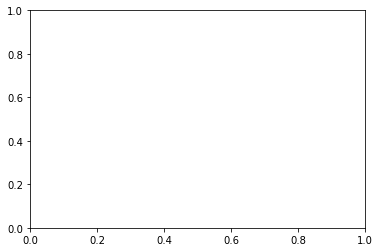

In [500]:
# Data to make the plot

bars = ['doggo', 'doggo,floofer', 'doggo,pupper','doggo,puppo', 'floofer', 'floofer,puppo', 'pupper', 'pupper,puppo','puppo']
y_pos = np.arange(len(bars))
 
# Create bars
plt.bar(y_pos, average_rating)
 
# Create names on the x-axis
plt.xticks(y_pos, bars)
 
# Show graphic
plt.show()
plt.figure(figsize=(40,20))
plt.savefig('test2png.png', dpi=400)

In [ ]:
popular_breeds = ['retriever','terrier','corgi','chihuahua','poodle','pug']
popular_breeds_list = twitter_archive_clean[twitter_archive_clean['dog_breed'].isin(popular_breeds)]
popular_breeds_list
#rating_breed = twitter_clean[twitter_clean['dog_breed'] != '']
#rating_breed = rating_breed[twitter_clean['dog_breed'] == popular_breeds]
#average_rating_breed = popular_breeds_list.groupby(['dog_breed'])['overall_rating'].mean()
#average_rating_breed()

In [ ]:
 
# Make fake dataset
height = [3, 12, 5, 18, 45]
bars = ('A', 'B', 'C', 'D', 'E')
y_pos = np.arange(len(bars))
 
# Create horizontal bars
plt.barh(y_pos, height)
 
# Create names on the y-axis
plt.yticks(y_pos, bars)
 
# Show graphic
plt.show()


In [ ]:
twitter_clean[twitter_clean['dog_breed'] == 'accordion'].tweet_id

## Information for act_report

### The first post

In [ ]:
first_post = twitter_clean['timestamp'].min()
output_cols = ['tweet_id','favorite_count', 'retweet_count', 'timestamp', 'text', 'overall_rating']
twitter_clean[output_cols][twitter_clean['timestamp']==first_post]

### The goodest doggo

In [ ]:
goodest_doggo = twitter_clean['overall_rating'].max()
twitter_clean[output_cols][twitter_clean['overall_rating']==goodest_doggo]

In [ ]:
twitter_clean[twitter_clean['tweet_id'] == 749981277374128128].jpg_url

## Source:
https://gist.github.com/freimanas/39f3ad9a5f0249c0dc64
